# Read result file 
    - meta data: available results, mesh, time/freq domain
    - results: displacement and stress

1st step : load dpf client/server, generate documentation if needed

In [1]:
from ansys.dpf import core as dpf
import os
import grpc
#dpf.CHANNEL = grpc.insecure_channel('%s:%d' % ("10.110.8.22", 50054))
#res_files = os.getcwd() + r'\..\..\res_files'

2nd step : create a model

In [17]:
path = r'E:\dpf\dpf\res_files\file_static.rst'
model = dpf.Model(path)
metadata = model.metadata
results = model.results

In [18]:
print(metadata.result_info)

Static analysis
Unit system: Metric (m, kg, N, s, V, A)
Physics Type: Mecanic
Available results:
     -  displacement                  
     -  force                         
     -  stress                        
     -  volume                        
     -  energy_stiffness_matrix       
     -  hourglass_energy              
     -  thermal_dissipation_energy    
     -  kinetic_energy                
     -  co_energy                     
     -  incremental_energy            
     -  strain                        
     -  thermal_strains               
     -  thermal_strains_eqv           
     -  swelling_strains              
     -  temperature                   



In [19]:
print(metadata.meshed_region)

Meshed Region
	7143 nodes
	4299 elements
	Unit: m 



In [20]:
mesh = model.metadata.meshed_region

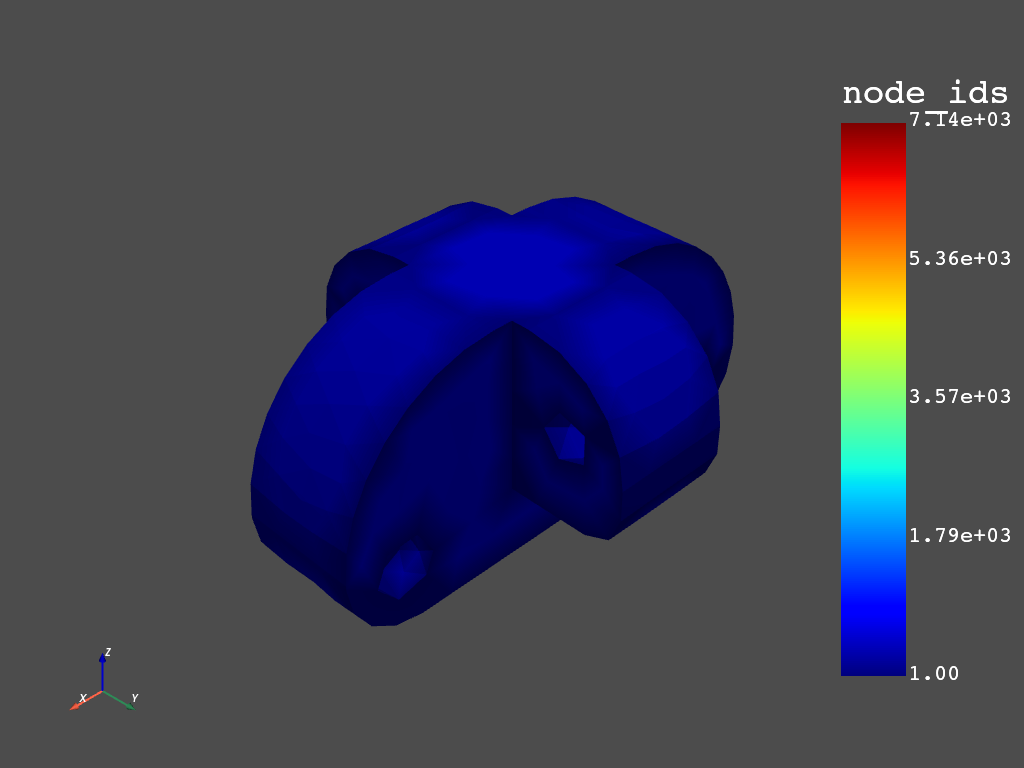

In [21]:
mesh.plot()

In [12]:
print(metadata.time_freq_support)


Time/Frequency Info:
	Number of sets: 35

With complex values
 
 Cumulative      Time (s)       Loadstep     Substep   
     1             0.0             1            1      
     2             0.02            1            2      
     3             0.04            1            3      
     4             0.06            1            4      
     5             0.08            1            5      
     6             0.1             1            6      
     7             0.12            1            7      
     8             0.14            1            8      
     9             0.16            1            9      
     10            0.18            1            10     
     11            0.2             1            11     
     12           0.219            1            12     
     13           0.239            1            13     
     14           0.259            1            14     
     15           0.279            1            15     
     16           0.299            1    

## read displacements and calculate Total deformatiom min max over time

In [23]:
displacements = model.results.displacement()
normOp = dpf.Operator("norm_fc")
minmaxOp = dpf.Operator("min_max_fc")
timeIds = list(range(1,metadata.time_freq_support.n_sets+1))

In [24]:
nodes = dpf.Scoping()
nodes.ids = [669975]
#displacements.inputs.mesh_scoping.connect(nodes)

In [25]:
nodes.ids = [669975]
#displacements.inputs.mesh_scoping.connect(nodes)

In [26]:
displacements.inputs.time_scoping.connect(timeIds)
normOp.inputs.connect(displacements.outputs)
minmaxOp.inputs.connect(normOp.outputs)

In [27]:
fieldMin = minmaxOp.outputs.field_min()
fieldMax = minmaxOp.outputs.field_max()

In [28]:
timeSupport = metadata.time_freq_support
timefield = timeSupport.frequencies

In [29]:
fields = displacements.outputs.fields_container()

In [30]:
field = fields[0]

In [31]:
field.scoping.ids

[525,
 534,
 533,
 524,
 2757,
 2773,
 2755,
 2754,
 529,
 535,
 2765,
 2775,
 2756,
 532,
 523,
 2771,
 2753,
 2752,
 526,
 537,
 2760,
 2777,
 2759,
 522,
 2748,
 2749,
 528,
 2763,
 2750,
 3815,
 3824,
 527,
 2761,
 2758,
 531,
 2769,
 2751,
 536,
 2762,
 2779,
 530,
 2766,
 2764,
 2767,
 508,
 509,
 909,
 910,
 2712,
 2717,
 3525,
 2714,
 2713,
 2716,
 2776,
 2774,
 513,
 908,
 2715,
 2729,
 3523,
 2728,
 2778,
 507,
 911,
 2709,
 3527,
 2711,
 2710,
 2772,
 510,
 907,
 2721,
 3521,
 2719,
 2720,
 2781,
 506,
 2705,
 2704,
 2707,
 512,
 2706,
 2725,
 2726,
 511,
 2722,
 2718,
 2723,
 912,
 3529,
 2708,
 2770,
 906,
 2724,
 3518,
 2780,
 1057,
 3532,
 2727,
 2768,
 3520,
 500,
 501,
 916,
 917,
 2686,
 2691,
 3540,
 2688,
 2687,
 2690,
 3526,
 3528,
 505,
 915,
 2689,
 2703,
 3538,
 2702,
 3524,
 499,
 918,
 2683,
 3542,
 2685,
 2684,
 3530,
 502,
 914,
 2695,
 3536,
 2693,
 2694,
 3522,
 498,
 2679,
 2678,
 2681,
 504,
 2680,
 2699,
 2700,
 503,
 2696,
 2692,
 2697,
 919,
 3544,
 2

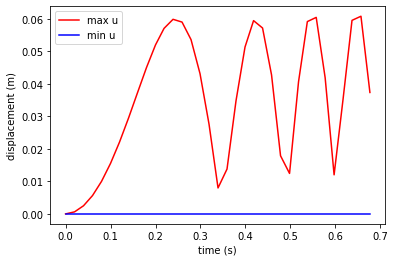

In [32]:
import matplotlib.pyplot as pyplot

pyplot.plot(timefield.data,fieldMax.data,'r',label='max u')
pyplot.plot(timefield.data,fieldMin.data,'b',label="min u")
#pyplot.title("maximum and minimum of displacement over time")
pyplot.xlabel("time (s)")
pyplot.ylabel("displacement (m)")
leg = pyplot.legend()

## read stresses and calculate stress equivalent min max over time

In [33]:
stressOp = results.stress()

In [34]:
sets=[]
for i in range (1,50):
    sets.append(i*4)

In [35]:
sets

[4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 36,
 40,
 44,
 48,
 52,
 56,
 60,
 64,
 68,
 72,
 76,
 80,
 84,
 88,
 92,
 96,
 100,
 104,
 108,
 112,
 116,
 120,
 124,
 128,
 132,
 136,
 140,
 144,
 148,
 152,
 156,
 160,
 164,
 168,
 172,
 176,
 180,
 184,
 188,
 192,
 196]

In [36]:
stressOp.inputs.time_scoping.connect(sets)
stressOp.inputs.requested_location.connect("Nodal")

eqv = stressOp.eqv()
minmaxOp.inputs.fields_container.connect(eqv.outputs)

In [37]:
fieldMin = minmaxOp.outputs.field_min()
fieldMax = minmaxOp.outputs.field_max()

DPFServerException: min_max_fc<-S_eqv<-eqv_fc<-S<-to_nodal_fc<-mapdl::rst::S<-mapdl::rst::S<-the requested set is out of range, failed to read element nodal component stresses from rst file. 

ValueError: x and y must have same first dimension, but have shapes (49,) and (35,)

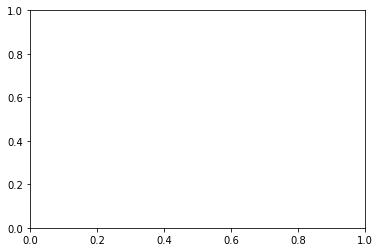

In [38]:
import matplotlib.pyplot as pyplot

pyplot.plot(sets,fieldMax.data,'r',label='max eqv')
pyplot.plot(sets,fieldMin.data,'b',label="min eqv")
#pyplot.title("maximum and minimum of displacement over time")
pyplot.xlabel("time (s)")
pyplot.ylabel("stress (Pa)")
leg = pyplot.legend()

In [39]:
stressOp.inputs.time_scoping.connect(timeIds)
stressOp.inputs.requested_location.connect("Nodal")

eqv = stressOp.eqv()
minmaxOp.inputs.fields_container.connect(eqv.outputs)

In [40]:
fieldMin = minmaxOp.outputs.field_min()
fieldMax = minmaxOp.outputs.field_max()

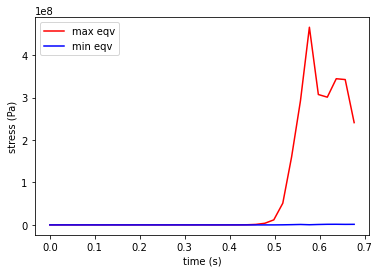

In [41]:
import matplotlib.pyplot as pyplot

pyplot.plot(timefield.data,fieldMax.data,'r',label='max eqv')
pyplot.plot(timefield.data,fieldMin.data,'b',label="min eqv")
#pyplot.title("maximum and minimum of displacement over time")
pyplot.xlabel("time (s)")
pyplot.ylabel("stress (Pa)")
leg = pyplot.legend()

## export to vtk

In [16]:
vtk = dpf.Operator("vtk_export")

In [17]:
vtk.inputs.file_path(r'c:/temp/file_static.vtk')
vtk.inputs.mesh.connect(metadata.meshed_region)
vtk.inputs.fields1.connect(eqv.outputs.fields_container)
vtk.inputs.fields2.connect(displacements.outputs.fields_container)
vtk.run()

In [35]:
import scipy
import numpy as np

In [36]:
toto = scipy.fft(fieldMax.data)
N= 202
T = 4.0/202.


In [40]:
xf = np.linspace(0.0, 1.0/(T), N)

In [41]:
xf

array([ 0.        ,  0.25124378,  0.50248756,  0.75373134,  1.00497512,
        1.25621891,  1.50746269,  1.75870647,  2.00995025,  2.26119403,
        2.51243781,  2.76368159,  3.01492537,  3.26616915,  3.51741294,
        3.76865672,  4.0199005 ,  4.27114428,  4.52238806,  4.77363184,
        5.02487562,  5.2761194 ,  5.52736318,  5.77860697,  6.02985075,
        6.28109453,  6.53233831,  6.78358209,  7.03482587,  7.28606965,
        7.53731343,  7.78855721,  8.039801  ,  8.29104478,  8.54228856,
        8.79353234,  9.04477612,  9.2960199 ,  9.54726368,  9.79850746,
       10.04975124, 10.30099502, 10.55223881, 10.80348259, 11.05472637,
       11.30597015, 11.55721393, 11.80845771, 12.05970149, 12.31094527,
       12.56218905, 12.81343284, 13.06467662, 13.3159204 , 13.56716418,
       13.81840796, 14.06965174, 14.32089552, 14.5721393 , 14.82338308,
       15.07462687, 15.32587065, 15.57711443, 15.82835821, 16.07960199,
       16.33084577, 16.58208955, 16.83333333, 17.08457711, 17.33

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


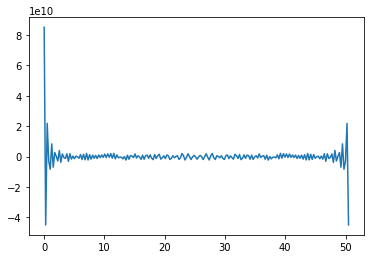

In [42]:
pyplot.plot(xf, toto)

In [27]:
len(fieldMax.data)

202

In [28]:
202/4

50.5

In [29]:
1.7*418.88/4

178.024

In [30]:
import math

In [32]:
178./(2.0*math.pi)

28.32957987035737